In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
path = os.path.join(os.getcwd(),"data","ex1data1.txt")
data = pd.read_csv(path, header = None, 
                   names = ["Population", "Profit"])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data = data.values
population = data[:,0]
y = data[:,1].reshape(-1,1)
theta = np.random.randn(2,1)
X = np.c_[np.ones(len(population)), population]
X.shape, theta.shape, y.shape

((97, 2), (2, 1), (97, 1))

In [4]:
theta

array([[-0.66423927],
       [-1.01862589]])

In [5]:
def MSE(y_pred,y):
    sum_errors_sq = np.sum((y_pred - y)**2)
    return sum_errors_sq/(2*len(y))

In [6]:
y_pred = np.dot(X,theta)
mse = MSE(y_pred,y)
rmse = np.sqrt(mse)
mse, rmse, y_pred.shape

(150.47090665984672, 12.266658333052515, (97, 1))

Gradient Descent Formula:
    - theta:= theta - learnrate*
    
for iteration in range(n_iterations):
    find predictions
    theta

In [7]:
# cost_list = []
# n_iterations = 1000
# eta = 0.01

# for iteration in range(n_iterations):
#     y_pred = X.dot(theta)
#     cost = np.sqrt(MSE(y_pred,y))
#     cost_list.append(cost)
#     error = y_pred - y
#     temp = np.matrix(np.zeros(theta.shape))
#     for weight_i in range(len(theta)):
#         weight_step = np.sum(error*X[:,weight_i])
#         temp[0,weight_i] = weight_i - (eta/len(y))*weight_step
#     y_pred = X.dot(theta)
    
# plt.plot(list(range(n_iterations)), cost_list)

In [8]:
theta

array([[-0.66423927],
       [-1.01862589]])

In [9]:
MSE(X.dot(theta), y)

150.47090665984672

# Univariate Linear Regression: 

In [10]:
path = os.path.join(os.getcwd(),"data","ex1data1.txt")
data = pd.read_csv(path, header = None, 
                   names = ["Population", "Profit"])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [11]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Let's plot the data to get a better idea of what the data looks like: 

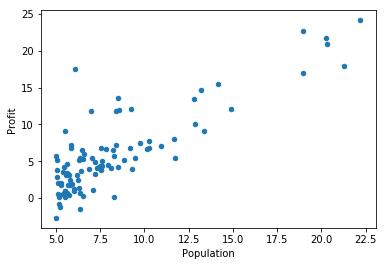

In [12]:
data.plot(kind = "scatter", x = "Population", y = "Profit")

In [13]:
def compute_cost(X, y, theta):
    sum_squared_errors = np.sum((X.dot(theta.T) - y)**2)
    return sum_squared_errors/(2*len(y))

Adding a comlum of ones to the training set so we can use a vectorized solution to computing the cost and gradients: 


In [14]:
data.insert(0, "Ones", 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [15]:
X = data.iloc[:,:2].values
y = data.iloc[:,2].values.reshape(-1,1)
X.shape, y.shape

((97, 2), (97, 1))

In [16]:
theta = np.zeros((1,2))
theta, theta.shape

(array([[ 0.,  0.]]), (1, 2))

- # Formula for Gradient Descent: 
    - # $\theta_j := \theta_j - \eta\frac{1}{m}\sum_{i=1}^m(\hat{y}^i - y^i)x_j^i$

In [17]:
# y_pred = X.dot(theta.T)
# term = (y_pred-y)*X

In [18]:
# np.sum(term, axis = 0)
# >> array([ -566.3961    , -6336.89842532])

In [19]:
# theta - np.sum(term, axis = 0)
# >> array([[  566.3961    ,  6336.89842532]])

In [20]:
def gradientDescent(X,y, theta, eta, iters):
    error_list = []
    parameters = []
    for i in range(iters):
        # Calculate prediction with current parameters 
        y_pred = X.dot(theta.T)
        # Calculate MSE
        error = MSE(y_pred , y)
        # and append it to the list of errors 
        error_list.append(error)
        
        # Multiply error with each x_i^j 
        # ∑(y^ - y).x_j^i
        term = (y_pred-y)*X
        term = np.sum(((y_pred-y)*X), axis = 0)
        # Weight Update
        theta = theta - (eta/len(X))*term
        parameters.append(theta[0])
        
    return parameters, error_list, theta

In [21]:
theta

array([[ 0.,  0.]])

In [22]:
parameters, error_list, theta = gradientDescent(X,y,theta, eta = 0.01,
                                   iters = 1000)
theta

array([[-3.24140214,  1.1272942 ]])

In [23]:
# Last error seen: 
error_list

[32.072733877455676,
 6.7371904648700074,
 5.9315935686049563,
 5.9011547070813881,
 5.8952285864442207,
 5.8900949431173304,
 5.885004158443647,
 5.8799324804914184,
 5.8748790947625746,
 5.8698439118063863,
 5.8648268653129305,
 5.8598278899321814,
 5.8548469205722897,
 5.8498838923765879,
 5.8449387407220339,
 5.8400114012183613,
 5.8351018097072265,
 5.8302099022613882,
 5.8253356151838629,
 5.8204788850070992,
 5.8156396484921542,
 5.8108178426278698,
 5.8060134046300442,
 5.801226271940628,
 5.7964563822268991,
 5.7917036733806535,
 5.7869680835173964,
 5.7822495509755392,
 5.7775480143155962,
 5.7728634123193814,
 5.7681956839892123,
 5.7635447685471197,
 5.7589106054340489,
 5.7542931343090773,
 5.7496922950486287,
 5.7451080277456841,
 5.7405402727090138,
 5.7359889704623814,
 5.7314540617437917,
 5.7269354875047016,
 5.7224331889092568,
 5.7179471073335284,
 5.7134771843647494,
 5.7090233618005488,
 5.7045855816481987,
 5.7001637861238557,
 5.6957579176518154,
 5.691367918863

[0, 1000, 4.5, 7]

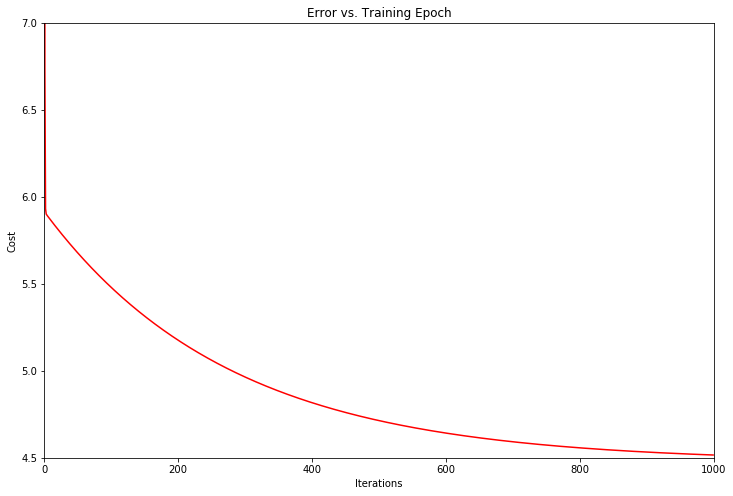

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1000), error_list, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.axis([0,1000,4.5,7])

In [25]:
x1 = np.linspace(X[:,1].min(), X[:,1].max(), len(X))
X_new = np.c_[np.ones(len(X)),x1]

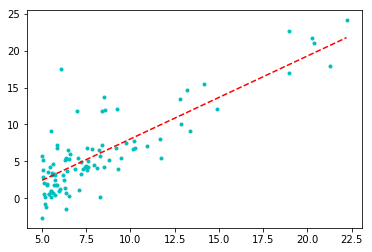

In [26]:
def predict(X,theta):
    return X.dot(theta.T)
y_pred = predict(X_new, theta)

plt.plot(X[:,1], y, 'c.')
plt.plot(x1 ,y_pred, 'r--')

In [27]:
params = np.array(parameters)
params

array([[ 0.05839135,  0.6532885 ],
       [ 0.06289175,  0.77000978],
       [ 0.05782293,  0.79134812],
       ..., 
       [-3.23903659,  1.12705656],
       [-3.24022043,  1.12717549],
       [-3.24140214,  1.1272942 ]])

In [29]:
def MSE(X,theta,y):
    y_pred = np.array(X.dot(theta))
    sum_errors_sq = np.sum((y_pred - y)**2)
    return sum_errors_sq/(2*len(y))

In [30]:
X = data.iloc[:,:2].values
y = data.iloc[:,2].values.reshape(-1,1)
X.shape, y.shape

((97, 2), (97, 1))

In [31]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

theta_0 = np.linspace(params[:,0].min(), params[:,0].max(), 100)
theta_1 = np.linspace(params[:,1].min(), params[:,1].max(), 100)
theta = []
for index in range(len(theta_0)):
    theta.append(np.array([theta_0[index], theta_1[index]]))
theta = np.array(theta)
Z = []
for parameters in theta:
    cost = np.sqrt(MSE(X, parameters, y))
    Z.append(cost)
Z = np.array(Z)
theta_0.shape, theta_1.shape, Z.shape

((100,), (100,), (100,))

In [32]:
params

array([[ 0.05839135,  0.6532885 ],
       [ 0.06289175,  0.77000978],
       [ 0.05782293,  0.79134812],
       ..., 
       [-3.23903659,  1.12705656],
       [-3.24022043,  1.12717549],
       [-3.24140214,  1.1272942 ]])

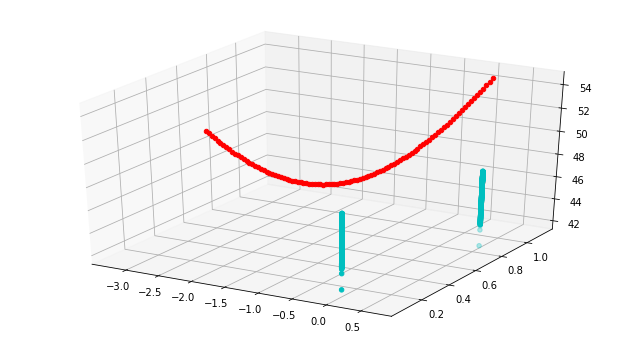

In [33]:
fig = plt.figure(figsize = (11,6))
ax = fig.gca(projection='3d')
ax.scatter(theta_0, theta_1, Z, c= "r", depthshade = False)
for theta in params:
    ax.scatter(params[0], params[1], np.sqrt(MSE(X,theta,y)) ,c = "c")

# Multi-Variate Linear Regression: 

In [34]:
from mpl_toolkits.mplot3d import Axes3D  
path = path = os.path.join(os.getcwd(),"data","ex1data2.txt")
data2 = pd.read_csv(path, header = None, names = ["Size", 
                                                 "Bedroom",
                                                 "Price"])
data2.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [35]:
x = np.array(data2["Size"])
y = np.array(data2["Bedroom"])
z = np.array(data2["Price"])

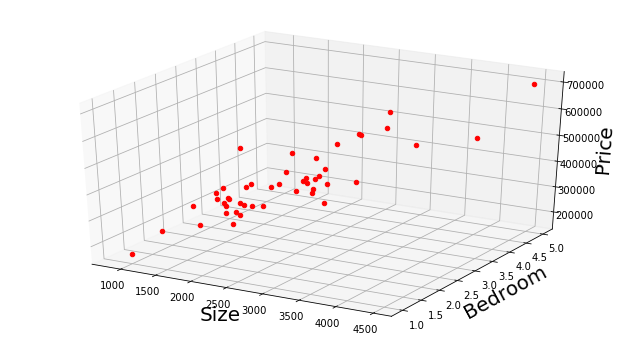

In [36]:
fig = plt.figure(figsize = (11,6))
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, c= "r", depthshade = False)
ax.set_xlabel("Size", fontsize = 20)
ax.set_ylabel("Bedroom", fontsize = 20)
ax.set_zlabel("Price",rotation = 90 ,fontsize = 20 )

In [37]:
theta = np.zeros((1,3))
theta

array([[ 0.,  0.,  0.]])

In [38]:
x1x2 = data2.iloc[:,:2].values
x0 = np.ones(len(x1x2))
X = np.c_[x0, x1x2]
y = data2.iloc[:,2].values.reshape(-1,1)
X.shape, y.shape

((47, 3), (47, 1))

In [39]:
X[:,0].mean()

1.0

In [40]:
# Normalizing the features:
# for column in range(X.shape[1]):
#     mean = X[:,column].mean()
#     std = X[:,column].std()
#     X[:,column] = (X[:,column] - mean)/ std
X[:,1] = (X[:,1] - X[:,1].mean())/ X[:,1].std()
X[:,2] = (X[:,2] - X[:,2].mean())/ X[:,2].std()


In [41]:
pd.DataFrame(X).head()

,0,1,2
0,1.0,0.131415,-0.226093
1,1.0,-0.509641,-0.226093
2,1.0,0.507909,-0.226093
3,1.0,-0.743677,-1.554392
4,1.0,1.271071,1.102205


In [42]:
def MSE(y_pred,y):
    sum_errors_sq = np.sum((y_pred - y)**2)
    return sum_errors_sq/(2*len(y))

In [43]:
def gradientDescent(X,y, theta, eta, iters):
    error_list = []
    
    for i in range(iters):
        # Calculate prediction with current parameters 
        y_pred = X.dot(theta.T)
        # Calculate MSE
        error = MSE(y_pred , y)
        # and append it to the list of errors 
        error_list.append(error)
        
        # Multiply error with each x_i^j 
        # ∑(y^ - y).x_j^i
        term = (y_pred-y)*X
        term = np.sum(((y_pred-y)*X), axis = 0)
        # Weight Update
        theta = theta - (eta/len(X))*term
    
    return error_list, theta

In [44]:
# y_pred = X.dot(theta.T)
# error = MSE(y_pred , y)
# term = (y_pred-y)*X
# term = np.sum(((y_pred-y)*X), axis = 0)
# # Weight Update
# theta = theta - (eta/len(X))*term
# theta

In [45]:
error_list, theta = gradientDescent(X, y, theta, eta = 0.01, iters = 1000)
theta

array([[ 340397.96353532,  108742.65627238,   -5873.22993383]])

In [46]:
predict(np.array([1,0.31,-0.22]),theta)

array([ 375400.2975652])

In [47]:
y[0]

array([399900])

In [48]:
x1 = np.linspace(X[:,1].min(), X[:,1].max(), len(X))
x2 = np.linspace(X[:,2].min(), X[:,2].max(), len(X))
x0 = np.ones(len(X))
X_new = np.c_[x0,x1,x2]
z_new = predict(X_new, theta).reshape(47,)
pd.DataFrame(np.c_[X_new, z_new]).head()

,0,1,2,3
0,1.0,-1.461049,-2.882690,198450.276440
1,1.0,-1.360788,-2.767186,208674.627668
2,1.0,-1.260526,-2.651682,218898.978896
3,1.0,-1.160264,-2.536178,229123.330123
4,1.0,-1.060002,-2.420674,239347.681351


In [49]:
data2["Size"].std(), data2["Size"].min(), 

(794.70235353388966, 852)

In [50]:
# Unscaling the features x1 for visualisations
x1 = (x1*data2["Size"].std()) + data2["Size"].mean()
pd.DataFrame(x1).head()

,0
0,839.581468
1,919.259753
2,998.938039
3,1078.616325
4,1158.294610


In [51]:
# Unscaling x2 for visualisations:  
x2 = (x2*data2["Bedroom"].std()) + data2["Bedroom"].mean()
pd.DataFrame(x2).head()

,0
0,0.976538
1,1.064434
2,1.152331
3,1.240227
4,1.328124


In [52]:
pd.DataFrame(np.c_[x1,x2,z_new]).sample(frac=5/47)

,0,1,2
17,2194.112324,2.470780,372264.247312
37,3787.678036,4.228712,576751.271867
13,1875.399181,2.119194,331366.842401
38,3867.356322,4.316609,586975.623094
30,3229.930037,3.613436,505180.813272


In [53]:
x1.shape, x2.shape, z_new.shape

((47,), (47,), (47,))

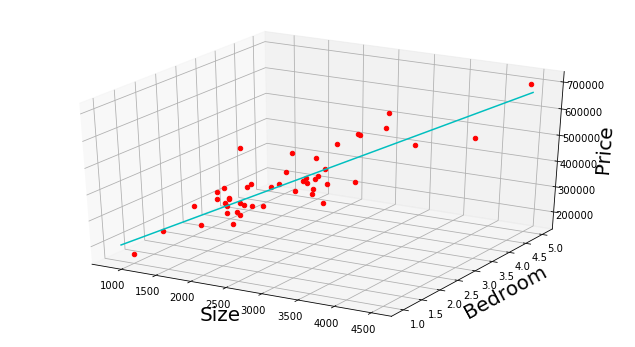

In [54]:
x = np.array(data2["Size"])
y = np.array(data2["Bedroom"])
z = np.array(data2["Price"])

x.shape, y.shape, z.shape
fig = plt.figure(figsize = (11,6))
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, c= "r", depthshade = False)
ax.plot(x1,x2,z_new, c = "c")

ax.set_xlabel("Size", fontsize = 20)
ax.set_ylabel("Bedroom", fontsize = 20)
ax.set_zlabel("Price",rotation = 90 ,fontsize = 20 )

### Taking a loot at the training process: 

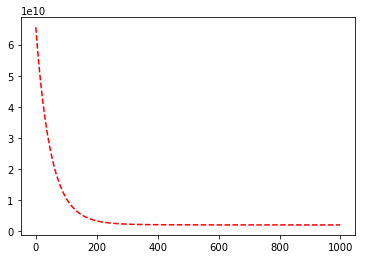

In [55]:
plt.plot(list(range(1000)), error_list, "r--")

## Implementing the same in SkLearn: 


In [56]:
path = path = os.path.join(os.getcwd(),"data","ex1data2.txt")
data2 = pd.read_csv(path, header = None, names = ["Size", 
                                                 "Bedroom",
                                                 "Price"])
data2.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [57]:
x1x2 = data2.iloc[:,:2].values
x0 = np.ones(len(x1x2))
X = np.c_[x0, x1x2]
y = data2.iloc[:,2].values
X.shape, y.shape

((47, 3), (47,))

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lin_reg = LinearRegression()

scaled_lin_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_model", lin_reg)])

scaled_lin_reg.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [59]:
lin_reg.coef_

array([      0.        ,  109447.79646964,   -6578.35485416])

In [ ]:
lin_reg.intercept_

In [ ]:
lin_reg.predict([1,0.31,-0.22])

In [ ]:
y[0]